In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
display(train)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
display(test)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
labels = train["label"].to_numpy()
display(labels)

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [7]:
train.drop(columns='label', axis=1, inplace=True)
display(train)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Convert the pixels for each image into a numpy array
train_pixels = train.to_numpy()

# Print the pixels to make sure they're in an array
print(train_pixels)

# Print the shape of a pixel to know absolutely what size it is
print(train_pixels[9999].shape)

# Print the length of both the pixels and the labels to make sure they're the same.
print(len(train_pixels), len(labels))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(784,)
42000 42000


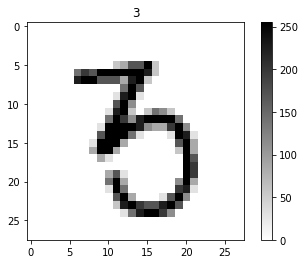

In [9]:
np_arr = train_pixels[90].reshape(28,28)
plt.imshow(np_arr, interpolation='nearest', cmap=plt.cm.binary)
plt.title(labels[90])
plt.colorbar()
plt.show()

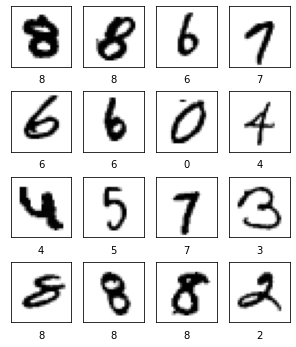

In [10]:
plt.figure(figsize=(5,6))

for i in range(16):
    k = random.randint(0, 42000)
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_pixels[k].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[k])

In [11]:
ranged = np.unique(train_pixels)
print(ranged)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [12]:
train_pixels = train_pixels / 255
test = test / 255

In [13]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),     # Converting matrix forms (28x28) to vector forms (784)
            tf.keras.layers.Dense(128, activation=tf.nn.relu),   # A layer with 128 nodes and ReLU as the choice of the activation function
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # Output layer with 10 nodes (because there are 10 classifications)
])

In [14]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(train_pixels, labels, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 20s 3ms/step - loss: 0.2984 - accuracy: 0.9140
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1378 - accuracy: 0.9598
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0942 - accuracy: 0.9718
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0697 - accuracy: 0.9790
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0526 - accuracy: 0.9847
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0421 - accuracy: 0.9872
Epoch 7/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9891
Epoch 8/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0261 - accuracy: 0.9922
Epoch 9/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0214 - accuracy: 0.9938
Epoch 10/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.01

In [15]:
test_data = pd.read_csv('test.csv')
X_test = []
for row in range(len(test_data)):
    spl = test_data.iloc[row, ]['pixel0' : 'pixel783']
    np_mid = spl.to_numpy() / 255
    np_arr = np_mid.reshape(28,28)
    X_test.append(np_arr)
    
X_test = tf.convert_to_tensor(X_test)
predictions = model.predict(X_test)

875/875 [==============================] - 2s 2ms/step


In [16]:
pred = []
img_id = []
ix = 1
for i in range(len(test)):
    ans = np.argmax(predictions[i])
    pred.append(ans)
    img_id.append(ix)
    ix+=1

In [17]:
print(predictions)

[[1.4270856e-12 1.1181928e-14 1.0000000e+00 ... 2.5644635e-08
  6.0925381e-10 1.1330095e-16]
 [9.9999881e-01 1.6069244e-15 2.1337683e-11 ... 6.9164106e-09
  6.5190767e-13 1.3750228e-12]
 [5.9212365e-08 8.6741602e-05 2.0779870e-04 ... 2.7393588e-04
  5.7477743e-04 9.9772161e-01]
 ...
 [2.6951556e-13 3.7824798e-14 3.0124295e-11 ... 5.2447641e-15
  3.8634913e-09 1.1222393e-07]
 [6.5743619e-09 4.4976388e-12 1.9562762e-08 ... 4.7269485e-05
  4.1440861e-05 9.8587531e-01]
 [4.2215398e-13 1.2371178e-14 1.0000000e+00 ... 1.3502681e-10
  3.1579528e-10 2.2275290e-13]]


In [18]:
output = pd.DataFrame({'ImageId': img_id, 'Label': pred})
output.to_csv('sumbission.csv', index=False)

In [19]:
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
